<a href="https://colab.research.google.com/github/Nsho0724/signate_phone/blob/main/price_range_defo_sc_w%E8%A3%9C%E5%AE%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/drive/My Drive/SIGNATE/compe01/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
sample_submission = pd.read_csv(path + "sample_submission.csv")

In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 1000000)

In [ ]:
print(train.shape)
print(test.shape)

(1200, 22)
(800, 21)


In [ ]:
train_df = train
test_df = test

In [ ]:
train_df.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
test_df.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
train_df.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
test_df.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [ ]:
train_df.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1203,0,0.680981,1,1,1,23,0.402580,117,3,2,1331,721,1970,15,1,4,1,0,1,2
1,3,1203,1,2.602754,1,0,0,8,0.415612,194,1,19,1571,1262,1150,14,16,14,1,0,1,3
2,4,1980,1,2.604065,1,0,0,6,0.858110,122,2,15,364,721,1970,18,12,11,1,0,1,1
3,5,1185,1,2.669403,1,3,0,33,0.027065,132,8,4,447,1162,1950,15,3,19,1,0,0,2
4,7,1203,1,2.375453,0,4,1,12,0.141485,135,6,5,364,1917,1970,16,7,6,1,1,1,0


In [ ]:
test_df.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1203,0,0.498993,1,0,1,40,0.914530,190,8,7,381,721,1970,6,1,2,1,0,1
1,2,1154,0,1.981014,0,1,0,33,0.025999,82,6,10,376,1555,1970,11,7,3,1,0,0
2,6,1027,1,1.647026,0,0,1,32,0.912318,103,6,1,364,1374,1970,17,1,6,1,0,0
3,10,833,0,1.070061,0,0,0,2,0.033010,156,7,0,1331,1710,832,12,8,8,1,1,0
4,12,1027,1,1.859165,0,4,1,2,0.612349,171,1,13,667,1642,2655,14,5,2,1,1,0


In [ ]:
df = pd.concat([train, test], axis=0)

In [ ]:
# import lightgbm as lgb
# # トレーニングデータの準備
# train_data = df[df['sc_w'] >= 1]  # sc_wが0でないデータをトレーニングデータとする

# # 特徴量の選択
# features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'talk_time', 'three_g', 'touch_screen', 'wifi']

# # データセットの分割
# X_train = train_data[features]
# y_train = train_data['sc_w']

# # LightGBMモデルの定義とトレーニング
# model = lgb.LGBMRegressor()
# model.fit(X_train, y_train)

# # テストデータの準備
# test_data = df[df['sc_w'] == 0]  # sc_wが0のデータをテストデータとする
# X_test = test_data[features]

# # テストデータの予測
# predicted_sc_w = model.predict(X_test)

# # sc_wの更新
# df.loc[df['sc_w'] == 0, 'sc_w'] = np.round(predicted_sc_w)  # 予測した値を元のデータに更新する

In [ ]:
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1203,0,0.680981,1,1,1,23,0.402580,117,3,2,1331,721,1970,15,1,4,1,0,1,2.0
1,3,1203,1,2.602754,1,0,0,8,0.415612,194,1,19,1571,1262,1150,14,16,14,1,0,1,3.0
2,4,1980,1,2.604065,1,0,0,6,0.858110,122,2,15,364,721,1970,18,12,11,1,0,1,1.0
3,5,1185,1,2.669403,1,3,0,33,0.027065,132,8,4,447,1162,1950,15,3,19,1,0,0,2.0
4,7,1203,1,2.375453,0,4,1,12,0.141485,135,6,5,364,1917,1970,16,7,6,1,1,1,0.0


In [ ]:
# #データをもどず
# train = df.iloc[:len(train), :]
# test = df.iloc[len(train):, :]

In [ ]:
# test = test.drop(["price_range"],axis = 1)

In [ ]:
zero = train[train['sc_w'] == 0]
zero.count()

id               101
battery_power    101
blue             101
clock_speed      101
dual_sim         101
fc               101
four_g           101
int_memory       101
m_dep            101
mobile_wt        101
n_cores          101
pc               101
px_height        101
px_width         101
ram              101
sc_h             101
sc_w             101
talk_time        101
three_g          101
touch_screen     101
wifi             101
price_range      101
dtype: int64

In [ ]:
train["sc_hw"] = train["sc_h"] * train["sc_w"]
train["clock_speed_n_cores"] = train["clock_speed"] * train["n_cores"]
train["px_height_px_width"] = train["px_height"] * train["px_width"]
# メモリの容量比率（memory_ratio）
train['memory_ratio'] = train['int_memory'] / train['battery_power']
# ???
# train["int_memory_pc"] = train["int_memory"]+train["pc"]

In [ ]:
test["sc_hw"] = test["sc_h"] * test["sc_w"]
test["clock_speed_n_cores"] = test["clock_speed"] * test["n_cores"]
test["px_height_px_width"] = test["px_height"] * test["px_width"]
# メモリの容量比率（memory_ratio）
test['memory_ratio'] = test['int_memory'] / test['battery_power']
# ???
# test["int_memory_pc"] = test["int_memory"]+test["pc"]

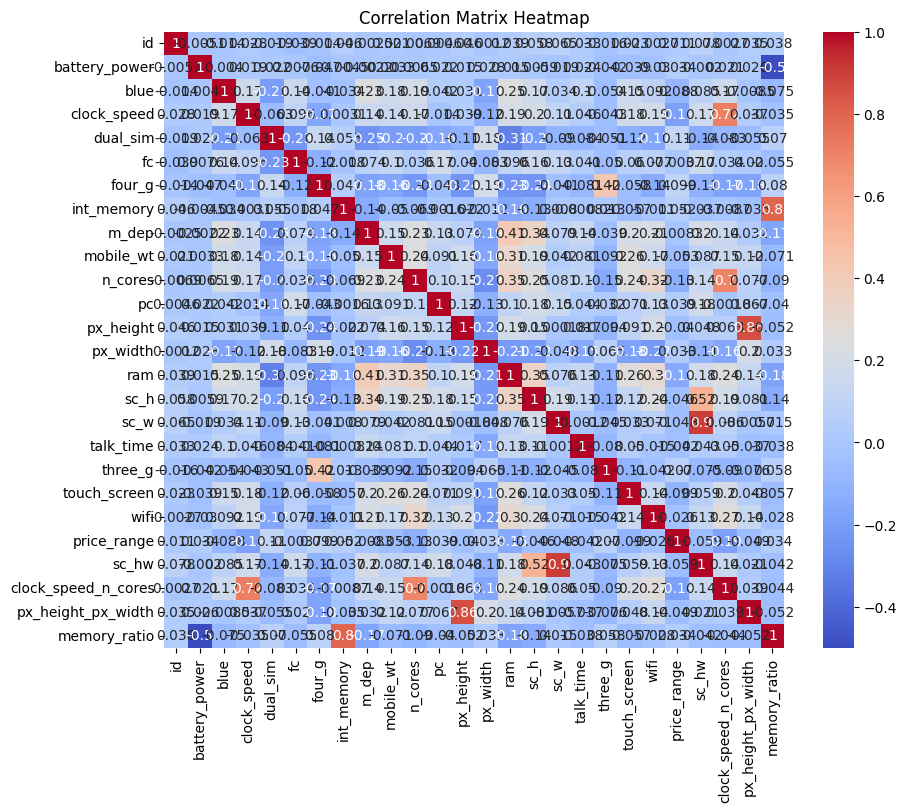

In [ ]:
correlation_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
train = train.drop(['sc_h', 'sc_w'], axis=1)
test = test.drop(['sc_h', 'sc_w'], axis=1)

In [ ]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import  GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# test_id = test.id

In [ ]:
#説明変数と目的変数に分割
X = train.drop(["id","price_range"],axis = 1)
y = train["price_range"]
#標準化
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
test_sc = scaler.fit_transform(test)

In [ ]:
lg = LGBMClassifier()
lg.fit(X,y)
lg_scores = cross_validate(lg,X,y,scoring ="accuracy",cv =5)

In [ ]:
# #標準化
# lg = LGBMClassifier()
# lg.fit(X_sc,y)
# lg_scores_sc = cross_validate(lg,X_sc,y,scoring ="accuracy",cv =5)

In [ ]:
rf = RandomForestClassifier()
# rf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth= 20,min_samples_leaf=1)
rf.fit(X,y)
rf_scores = cross_validate(rf,X,y,scoring ="accuracy",cv =5)

In [ ]:
# #標準化
# rf = RandomForestClassifier()
# # rf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth= 20,min_samples_leaf=1)
# rf.fit(X_sc,y)
# rf_scores_sc = cross_validate(rf,X_sc,y,scoring ="accuracy",cv =5)

In [ ]:
svc = SVC()
svc.fit(X,y)
svc_scores = cross_validate(svc,X,y,scoring ="accuracy",cv =5)

In [ ]:
# #標準化
# svc = SVC()
# svc.fit(X_sc,y)
# svc_scores_sc = cross_validate(svc,X_sc,y,scoring ="accuracy",cv =5)

In [ ]:
xg = XGBClassifier()
# xgb_y = y-1
xg.fit(X,y)
xg_scores = cross_validate(xg,X,y,scoring ="accuracy",cv =5)

In [ ]:
# #標準化
# xg = XGBClassifier()
# # xgb_y = y-1
# xg.fit(X_sc,y)
# xg_scores_sc = cross_validate(xg,X_sc,y,scoring ="accuracy",cv =5)

In [ ]:
def model_scores(model_scores):
    for key in model_scores.keys():
        print(key + ' test scores: ', model_scores[key])
    print("Average test score: ", model_scores["test_score"].mean())

In [ ]:
scores =[lg_scores,rf_scores,svc_scores,xg_scores]
# scores_sc =[lg_scores_sc,rf_scores_sc,svc_scores_sc,xg_scores_sc]
scores_ =["LGBMClassifier","RandomForestClassifier","SVC","XGBClassifier"]


In [ ]:
for i in range(len(scores)):
  print(scores_[i])
  model_scores(scores[i])
  print("\n")

LGBMClassifier
fit_time test scores:  [0.40223598 0.39681792 0.41678023 0.40485239 0.43988895]
score_time test scores:  [0.00851536 0.00853944 0.00860548 0.0083549  0.00849533]
test_score test scores:  [0.44166667 0.49583333 0.47916667 0.50416667 0.50833333]
Average test score:  0.48583333333333334


RandomForestClassifier
fit_time test scores:  [0.31284213 0.32816815 0.31017208 0.47159004 0.48252702]
score_time test scores:  [0.01788616 0.02602315 0.01705956 0.02652478 0.02190375]
test_score test scores:  [0.45       0.50416667 0.4875     0.49583333 0.49166667]
Average test score:  0.48583333333333334


SVC
fit_time test scores:  [0.12322617 0.12447309 0.12342906 0.11936188 0.12195897]
score_time test scores:  [0.03268838 0.03249145 0.03197193 0.03362799 0.03315473]
test_score test scores:  [0.40416667 0.3875     0.37916667 0.40833333 0.35416667]
Average test score:  0.38666666666666666


XGBClassifier
fit_time test scores:  [0.82060909 0.82271647 0.85754824 0.83174586 0.81347346]
sco

In [ ]:
# import lightgbm as lgb
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint as sp_randint

# # パラメータ探索範囲を設定
# param_dist = {
#     "num_leaves": sp_randint(20, 50),
#     "n_estimators": sp_randint(100, 1000),
#     "min_child_samples":sp_randint(10, 50)
# }

# # LightGBMの分類器モデルを作成
# model = lgb.LGBMClassifier()

# # ランダムサーチのインスタンスを作成
# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_dist,
#     n_iter=20,
#     scoring="accuracy",
#     cv=5,
#     random_state=42
# )

# # ランダムサーチを実行して最適なパラメータを探索
# random_search.fit(X, y)

# # 最適なパラメータを表示
# print("Best parameters found: ", random_search.best_params_)

# # 最適なパラメータでモデルを再構築
# best_model = lgb.LGBMClassifier(**random_search.best_params_)

# # トレーニングデータで学習させる
# best_model.fit(X, y)


In [ ]:
# lg_scores = cross_validate(best_model,X,y,scoring ="accuracy",cv =5)
# lg_scores

In [ ]:
# lg_scores["test_score"].mean()

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# ベースラインモデルの作成
baseline_model = lgb.LGBMClassifier()

# チューニングするパラメータと範囲の設定
param_grid = {
    # 'learning_rate': [0.1, 0.05, 0.01],
    # 'n_estimators': [100, 200, 300],
    # 'max_depth': [3, 5, 7],
    # 'num_leaves': [20, 30, 40],
    # 'feature_fraction': [0.8, 0.9],
    # 'bagging_fraction': [0.8, 0.9],
    "num_leaves": [28,29,30,31,32,33,34,35],
    "min_child_samples":[15,16,17,18,19,20,21,22,23,24,25]
}


# グリッドサーチによるパラメーターチューニング
grid_search = GridSearchCV(estimator=baseline_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X, y)

# チューニング後のモデルの取得
tuned_model = grid_search.best_estimator_

# チューニング後のパラメータの表示
print("Best parameters found: ", grid_search.best_params_)

# テストデータの予測
# y_pred = tuned_model.predict(test)

Best parameters found:  {'min_child_samples': 19, 'num_leaves': 30}


In [ ]:
lg_scores = cross_validate(tuned_model,X,y,scoring ="accuracy",cv =5)
lg_scores["test_score"].mean()

0.5041666666666667

In [ ]:
# grid_search.best_estimator_

In [ ]:
# for i in range(len(scores_sc)):
#   print(scores_[i])
#   model_scores(scores_sc[i])
#   print("\n")

In [ ]:
# test = pd.DataFrame(test_sc,columns = test.columns)

In [ ]:
lg_pred = tuned_model.predict(test.drop(["id"],axis = 1))

In [ ]:
print(lg_pred)

[3 2 3 1 2 3 0 1 1 1 1 2 3 1 3 3 1 3 3 1 2 1 2 1 1 1 3 1 3 2 0 2 1 2 1 2 0
 0 0 0 0 3 3 0 1 2 3 0 2 2 2 2 3 1 1 1 2 1 0 2 3 0 2 1 2 2 2 2 0 2 0 1 3 2
 0 1 0 0 2 2 1 1 0 2 2 3 2 1 3 0 2 3 1 3 3 2 0 1 2 2 0 2 3 2 2 0 3 2 2 2 2
 0 2 1 1 1 1 1 1 1 0 3 2 1 1 1 2 2 0 2 1 0 1 2 3 1 0 2 1 3 2 0 2 3 2 3 3 3
 2 0 2 3 2 2 3 1 1 2 3 3 2 0 2 1 2 3 0 1 1 1 2 3 1 3 2 3 3 1 2 1 2 2 0 0 2
 2 1 3 3 2 1 3 1 3 1 0 1 1 1 1 3 2 1 2 2 3 2 1 1 3 1 1 1 0 1 2 2 2 3 2 2 1
 1 2 1 3 1 2 1 1 2 3 3 0 0 2 2 2 2 2 2 1 0 3 3 3 0 2 3 0 0 3 2 2 3 2 0 1 1
 0 3 2 3 2 1 0 2 1 0 2 0 2 1 3 3 0 2 1 2 1 1 2 1 3 2 2 2 3 0 3 2 2 1 3 1 2
 2 1 2 2 0 2 1 3 1 2 2 1 3 3 0 1 1 2 2 1 3 2 2 0 2 1 2 3 0 2 1 3 2 2 3 2 1
 3 2 1 3 2 2 0 3 0 0 2 3 3 3 0 0 3 2 2 2 1 2 1 0 3 2 1 2 1 1 1 1 0 2 0 3 3
 1 0 1 2 2 1 3 0 1 1 1 2 3 1 2 2 1 2 3 2 1 3 1 0 3 2 3 2 3 2 0 0 3 0 1 3 3
 2 1 2 1 0 1 3 2 1 3 2 1 3 2 2 1 2 1 0 1 0 0 0 3 2 1 1 2 0 1 2 1 0 3 0 3 2
 3 2 0 1 3 0 2 0 2 2 0 3 0 3 2 3 2 3 2 2 2 3 2 0 2 0 1 2 3 2 2 2 3 2 1 0 2
 0 1 2 2 1 3 3 3 1 2 1 0 

In [ ]:
submission = pd.DataFrame({
    "id":test["id"],
    "price_range":lg_pred
})

In [ ]:
# submission = pd.DataFrame(test["id"],xg_pred)

In [ ]:
# submission = np.array([[test["id"]],[xg_pred]])

In [ ]:
submission["price_range"] = submission["price_range"].astype(int)

In [ ]:
submission.head(10)

,id,price_range
0,1,3
1,2,2
2,6,3
3,10,1
4,12,2
5,13,3
6,15,0
7,18,1
8,23,1
9,24,1


In [ ]:
# submission.columns =[]

In [ ]:
# Google Drive・Google Colaboratoryで作業する場合
submission.to_csv('submission.csv',header=False,index=False)

from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>